
# Chapter 12

# Lab: Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data


We also collect the new imports
needed for this lab.

In [2]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage


## Principal Components Analysis
In this lab, we perform PCA on  `USArrests`, a data set in the
`R` computing environment.
We retrieve the data using `get_rdataset()`, which can fetch data from
many standard `R` packages.

The rows of the data set contain the 50 states, in alphabetical order.

In [4]:
USArrests = get_rdataset('USArrests').data
USArrests.head()


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
USArrests.columns


Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
USArrests.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

Dataframes have several useful methods for computing
column-wise summaries. We can also examine the
variance of the four variables using the `var()`  method.

In [8]:
USArrests.var()


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

PCA looks for derived variables that account for most of the variance in the data set.
If we do not scale the variables before performing PCA, then the principal components
would mostly be driven by the
`Assault` variable, since it has by far the largest
variance.  So if the variables are measured in different units or vary widely in scale, it is recommended to standardize the variables to have standard deviation one before performing PCA.
Typically we set the means to zero as well.

This scaling can be done via the `StandardScaler()` transform imported above. We first `fit` the
scaler, which computes the necessary means and standard
deviations and then apply it to our data using the
`transform` method. As before, we combine these steps using the `fit_transform()` method.


In [7]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

In [9]:
pcaUS = PCA()

(By default, the `PCA()`  transform centers the variables to have
mean zero though it does not scale them.) The transform `pcaUS`
can be used to find the PCA
`scores` returned by `fit()`. Once the `fit` method has been called, the `pcaUS` object also contains a number of useful quantities.

In [10]:
pcaUS.fit(USArrests_scaled)


PCA()

After fitting, the `mean_` attribute corresponds to the means
of the variables. In this case, since we centered and scaled the data with
`scaler()` the means will all be 0.

In [11]:
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

The scores can be computed using the `transform()` method
of `pcaUS` after it has been fit.

In [12]:
scores = pcaUS.transform(USArrests_scaled)


We will plot these scores a bit further down.
The `components_` attribute provides the principal component loadings:
each row of `pcaUS.components_` contains the corresponding
principal component loading vector.


In [13]:
pcaUS.components_ 


array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

The `biplot`  is a common visualization method used with
PCA. It is not built in as a standard
part of `sklearn`, though there are python
packages that do produce such plots. Here we
make a simple biplot manually.

Here is the general syntax for the arrow() method:

```
Axes.arrow(x, y, dx, dy, **kwargs)
```
- x, y: The coordinates of the arrow's starting point.
- dx, dy: The components of the arrow (i.e., the change in x and y from the starting point to the ending point).
- **kwargs: Additional keyword arguments that control the appearance of the arrow (e.g., color, linestyle, etc.).
Here's a simple example to illustrate how the arrow() method works:

```
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Draw an arrow from (0, 0) to (1, 1)
ax.arrow(0, 0, 1, 1, head_width=0.1, head_length=0.1, fc='red', ec='black')

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

plt.show()
```

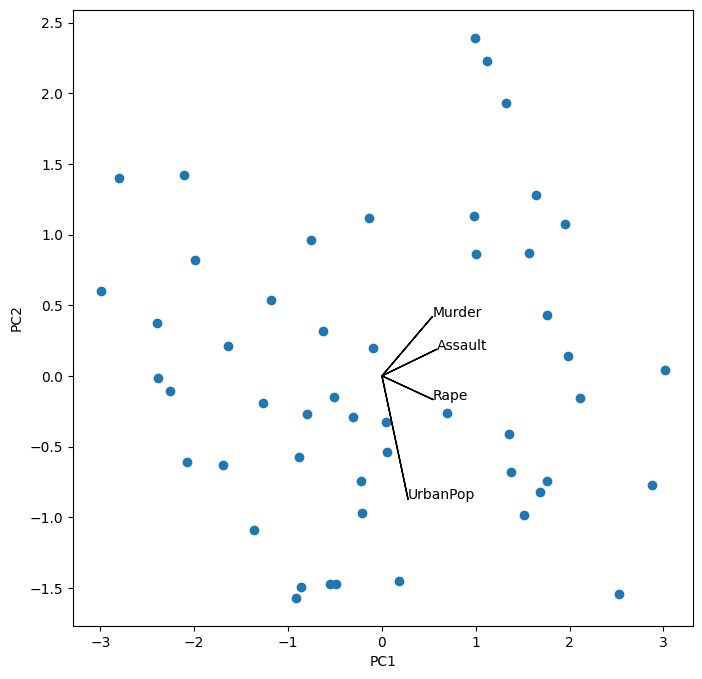

In [14]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    ax.text(pcaUS.components_[i,k],
            pcaUS.components_[j,k],
            USArrests.columns[k])


Notice that this figure is a reflection of Figure 12.1 through the $y$-axis. Recall that the
principal components are only unique up to a sign change, so we can
reproduce that figure by flipping the
signs of the second set of scores and loadings.
We also increase the length of the arrows to emphasize the loadings.

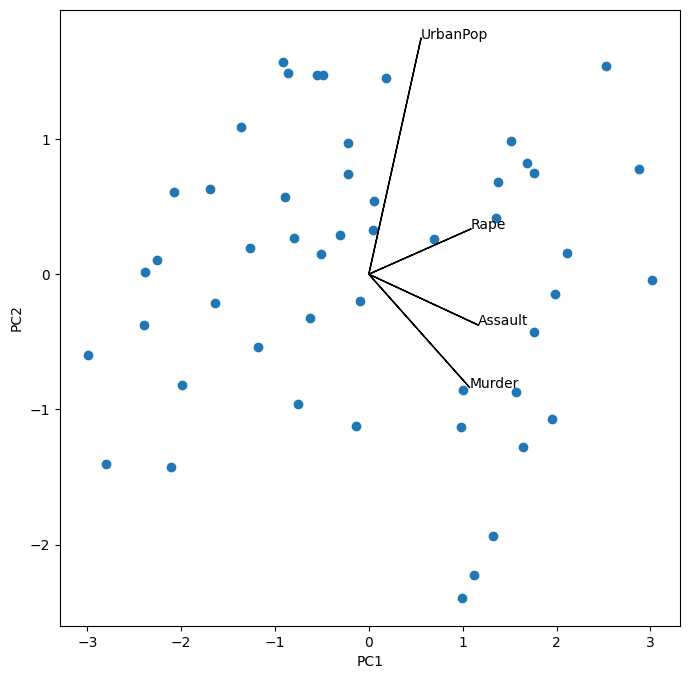

In [15]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k])
    ax.text(s_*pcaUS.components_[i,k],
            s_*pcaUS.components_[j,k],
            USArrests.columns[k])


The standard deviations of the principal component scores are as follows:

In [16]:
scores.std(0, ddof=1) #axis=0, divided by N-ddof=N-1

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

The variance of each score can be extracted directly from the `pcaUS` object via
the `explained_variance_` attribute.

In [17]:
pcaUS.explained_variance_


array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

The proportion of variance explained by each principal 
component (PVE) is stored as `explained_variance_ratio_`:

In [16]:
pcaUS.explained_variance_ratio_


array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [19]:
pcaUS.n_components_

4

In [17]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaUS.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pcaUS.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)


Notice the use of `%%capture`, which suppresses the displaying of the partially completed figure.

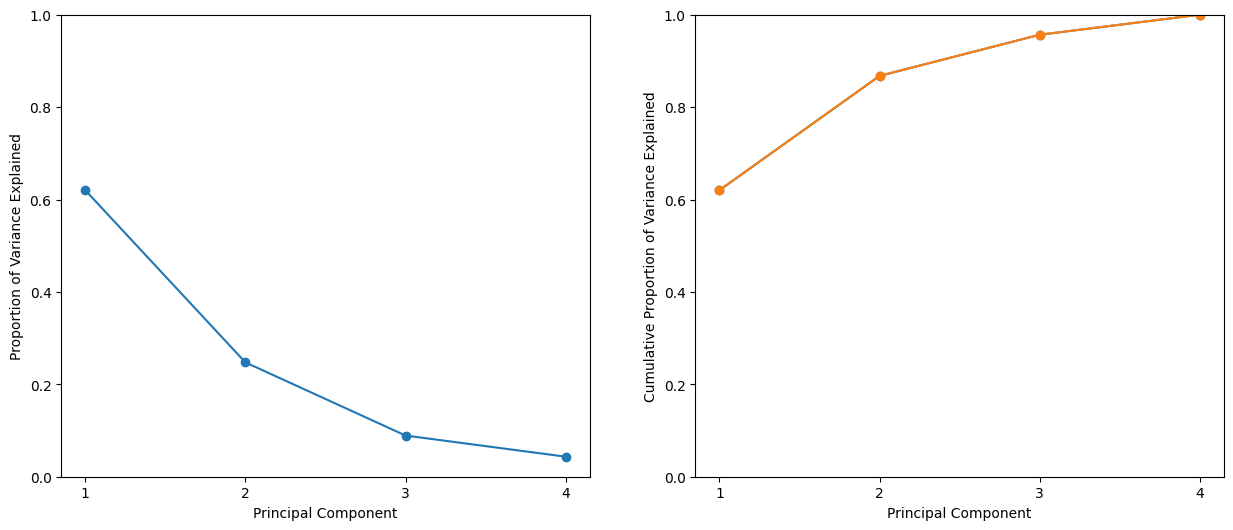

In [19]:
ax = axes[1]
ax.plot(ticks,
        pcaUS.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig


## Matrix Completion

The expression `np.linalg.svd(X, full_matrices=False)` involves performing a Singular Value Decomposition (SVD) on a matrix X using NumPy. Here's an explanation of the components:

`full_matrices=False`: This is an optional parameter specifying whether to compute the "full" or "truncated" SVD. When full_matrices is set to True (the default), the function computes the full-sized matrices U, S, and V. When set to False, it computes a truncated version of the SVD, where the matrices U and V have fewer columns.

The SVD factorization is expressed as:

$$X = U \text{diag}(S) V^T$$
where:
- X is the input matrix.
- U is the left singular vectors matrix.
- S is a diagonal matrix containing the singular values.
$V^T$ is the transpose of the right singular vectors matrix.
Here's a simple example:

In this example, U, S, and Vt represent the left singular vectors, the singular values, and the transpose of the right singular vectors, respectively. The diagonal matrix `np.diag(S)` contains the singular values.

Truncated SVD, as indicated by full_matrices=False, is often used when dealing with large datasets or for dimensionality reduction. It retains the most important components of the decomposition.

In [21]:
X = USArrests_scaled
U, D, V = np.linalg.svd(X, full_matrices=False) #note V is teh V^T in the math formula
U.shape, D.shape, V.shape


((50, 4), (4,), (4, 4))

The `np.linalg.svd()` function returns three components, `U`, `D` and `V`. The matrix `V` is equivalent to the
loading matrix from principal components (up to an unimportant sign flip). Using the `full_matrices=False` option ensures that
for a tall matrix the shape of `U` is the same as the shape of `X`.

In [22]:
# verify each row has a 2-norm 1
np.linalg.norm(V, 2, axis=1)

array([1., 1., 1., 1.])

In [24]:
# Check  X = UDV   (here V is V^T)
np.allclose(U.dot(np.diag(D)).dot(V)-X, 0)

False

The matrix `U` corresponds to a  *standardized* version of the PCA score matrix (each column standardized to have sum-of-squares one). If we multiply each column of `U` by the corresponding element  of `D`, we recover the PCA scores exactly (up to a meaningless sign flip).

In [25]:
(U * D[None,:])[:3]


array([[-0.98556588, -1.13339238,  0.44426879,  0.15626714],
       [-1.95013775, -1.07321326, -2.04000333, -0.43858344],
       [-1.76316354,  0.74595678, -0.05478082, -0.83465292]])

In [26]:
scores[:3]

array([[ 0.98556588, -1.13339238, -0.44426879,  0.15626714],
       [ 1.95013775, -1.07321326,  2.04000333, -0.43858344],
       [ 1.76316354,  0.74595678,  0.05478082, -0.83465292]])

While it would be possible to carry out this lab using the `PCA()` estimator,
here we use the `np.linalg.svd()` function in order to illustrate its use.

We now omit 20 entries in the $50\times 4$ data matrix at random. We do so
by first selecting 20 rows (states) at random, and then selecting one
of the four entries in each row at random. This ensures that every row has
at least three observed values.

In [36]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]),
                         n_omit,
                         replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]),
                         n_omit,
                         replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan


Here the array `r_idx`
contains 20 integers from 0 to 49; this represents the states (rows of `X`) that are selected to contain missing values. And `c_idx` contains
20 integers from 0 to 3, representing the features (columns in `X`) that contain the missing values for each of the selected states.

We now write some code to implement Algorithm 12.1. 
We first write a  function that takes in a matrix, and returns an approximation to the matrix using the `svd()` function.
This will be needed in Step 2 of Algorithm 12.1.

In [32]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M]
    return L.dot(V[:M])


To conduct Step 1 of the algorithm, we initialize `Xhat` --- this is $\tilde{\bf X}$ in Algorithm 12.1 ---  by replacing
the missing values with the column means of the non-missing entries. These are stored in
`Xbar` below after running `np.nanmean()` over the row axis.
We make a copy so that when we assign values to `Xhat` below we do not also overwrite the
values in `Xna`.

`np.nanmean()` is a function in NumPy that calculates the mean (average) of an array, ignoring any occurrences of NaN (Not a Number) values. It is useful when you have missing or undefined values in your data, and you want to calculate the mean while ignoring these NaN values.

In [37]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0) 
Xhat[r_idx, c_idx] = Xbar[c_idx]


Before we begin Step 2, we set ourselves up to measure the progress of our
iterations:

In [38]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)#Xna: original matrix with nan; Xhat: matrix completed with imputed values
mssold = np.mean(Xhat[~ismiss]**2) #initial mean squared error
mss0 = np.mean(Xna[~ismiss]**2)


We store the mean of the squared non-missing elements in `mss0`.
We store the mean squared error  of the non-missing elements  of the old version of `Xhat` in `mssold` (which currently
agrees with `mss0`). We plan to store the mean squared error of the non-missing elements of the current version of `Xhat` in `mss`, and will then
iterate Step 2 of  Algorithm 12.1  until the *relative error*, defined as
`(mssold - mss) / mss0`, falls below `thresh = 1e-7`.
 {Algorithm 12.1 tells us to iterate Step 2 until (12.14) is no longer decreasing. Determining whether (12.14)  is decreasing requires us only to keep track of `mssold - mss`. However, in practice, we keep track of `(mssold - mss) / mss0` instead: this makes it so that the number of iterations required for Algorithm 12.1 to converge does not depend on whether we multiplied the raw data $\bf X$ by a constant factor.}

In Step 2(a) of Algorithm 12.1, we  approximate `Xhat` using `low_rank()`; we call this `Xapp`. In Step 2(b), we  use `Xapp`  to update the estimates for elements in `Xhat` that are missing in `Xna`. Finally, in Step 2(c), we compute the relative error. These three steps are contained in the following `while` loop:

In [39]:
while rel_err > thresh:
    count += 1
    # Step 2(a)
    Xapp = low_rank(Xhat, M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2) # approx error on the true values
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))


Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08


`np.corrcoef(...)`: This is a NumPy function that calculates the Pearson correlation coefficient matrix for a set of variables. In this case, it takes the arrays obtained from Xapp[ismiss] and X[ismiss] as input.

In [64]:
np.corrcoef(Xapp[ismiss], X[ismiss])

array([[1.        , 0.71135674],
       [0.71135674, 1.        ]])

In [31]:
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]


0.7113567434297362

## Clustering

### $K$-Means Clustering

The estimator `sklearn.cluster.KMeans()`  performs $K$-means clustering in
`Python`.  

In [65]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;


We now perform $K$-means clustering with $K=2$.

`n_init`: This parameter determines the number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output in terms of inertia (sum of squared distances to the nearest centroid) among n_init consecutive runs. A higher value for n_init increases the likelihood of finding a better clustering result, but it also increases computation time.

In [40]:
kmeans = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X)


We specify `random_state` to make the results reproducible.  The cluster assignments of the 50 observations are contained in `kmeans.labels_`.

In [67]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

The $K$-means clustering perfectly separated the observations into two
clusters even though we did not supply any group information to
`KMeans()`. We can plot the data, with each observation
colored according to its cluster assignment.

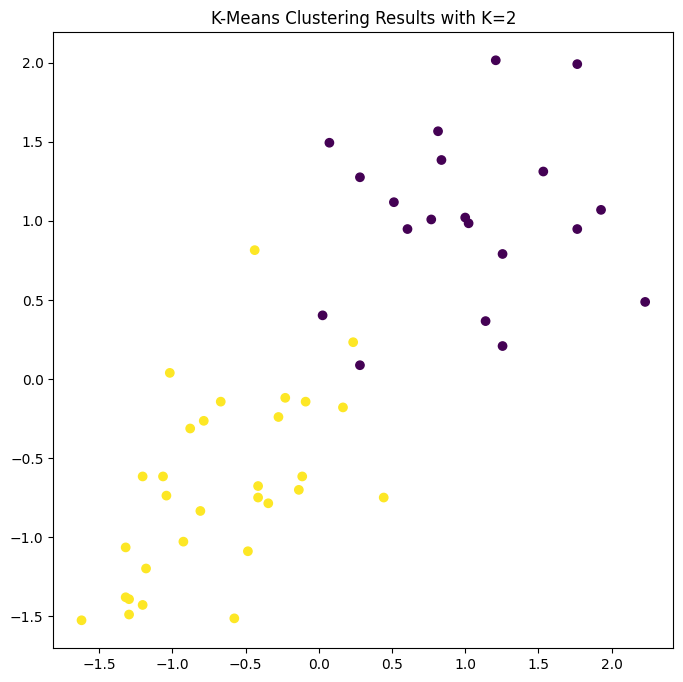

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");


Here the observations can be easily plotted because they are
two-dimensional. If there were more than two variables then we could
instead perform PCA and plot the first two principal component score
vectors to represent the clusters.

In this example,   we knew that there really
were two clusters because we generated the data. However, for real
data, we do not know the true number of clusters, nor whether they  exist in any precise way. We could
instead have performed $K$-means clustering on this example with
$K=3$.

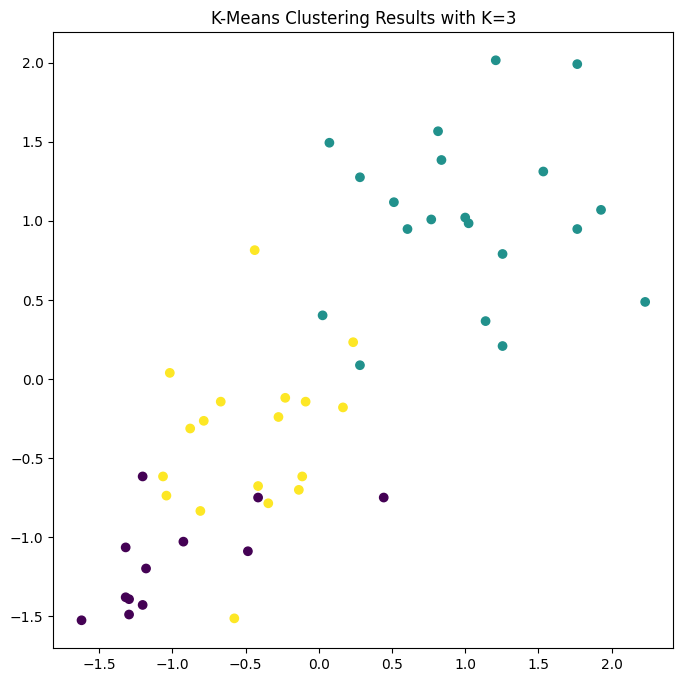

In [42]:
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");


When $K=3$, $K$-means clustering  splits up the two clusters.
We have used the `n_init` argument to run the $K$-means with 20 
initial cluster assignments (the default is 10). If a
value of `n_init` greater than one is used, then $K$-means
clustering will be performed using multiple random assignments in
Step 1 of  Algorithm 12.2, and the `KMeans()` 
function will report only the best results. Here we compare using
`n_init=1` to `n_init=20`.

In [43]:
kmeans1 = KMeans(n_clusters=3,
                random_state=3,
                n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
                  random_state=3,
                  n_init=20).fit(X);
kmeans1.inertia_, kmeans20.inertia_


(80.08569526137276, 79.95548163171662)

Note that `kmeans.inertia_` is the total within-cluster sum
of squares, which we seek to minimize by performing $K$-means
clustering (12.17). 

We *strongly* recommend always running $K$-means clustering with
a large value of `n_init`, such as 20 or 50, since otherwise an
undesirable local optimum may be obtained.

When performing $K$-means clustering, in addition to using multiple
initial cluster assignments, it is also important to set a random seed
using the `random_state` argument to `KMeans()`. This way, the initial
cluster assignments in Step 1 can be replicated, and the $K$-means
output will be fully reproducible.

### Hierarchical Clustering

The `AgglomerativeClustering()`  class from
the `sklearn.clustering` package implements hierarchical clustering.
As its
name is long, we use the short hand `HClust` for *hierarchical clustering*. Note that this will not change the return type
when using this method, so instances will still be of class `AgglomerativeClustering`.
In the following example we use the data from the previous lab to plot the hierarchical clustering
dendrogram using complete, single, and average linkage clustering
with Euclidean distance as the dissimilarity measure.  We begin by
clustering observations using complete linkage.

`distance_threshold`: This parameter sets the threshold to decide the number of clusters. Clusters are formed by merging elements that are at a distance less than or equal to the distance_threshold. If not provided or set to zero (distance_threshold=0), it merges clusters until the specified number of clusters (n_clusters) is reached. If distance_threshold is not zero and n_clusters is None, then clusters are formed based on this threshold.

`distance_threshold`: float, default=None
The linkage distance threshold at or above which clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.

`n_clusters`: This parameter specifies the number of clusters to form. If it's set to `None` (the default), the algorithm continues merging clusters until the specified `distance_threshold` is reached. If both `distance_threshold` and `n_clusters` are specified, the algorithm stops when either of the two conditions is met.



In [44]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X)


AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

This computes the entire dendrogram.
We could just as easily perform hierarchical clustering with average or single linkage instead:

In [72]:
hc_avg = HClust(distance_threshold=0,
                n_clusters=None,
                linkage='average');
hc_avg.fit(X)
hc_sing = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='single');
hc_sing.fit(X);


To use a precomputed distance matrix, we provide an additional
argument `metric="precomputed"`. In the code below, the first four lines computes the $50\times 50$ pairwise-distance matrix.

`metric`: str or callable, default=None
Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If set to None then “euclidean” is used. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix is needed as input for the fit method.

After the loop completes, the matrix D contains the pairwise Euclidean distances between each pair of rows in the original matrix X. The entry D[i, j] represents the Euclidean distance between the i-th and j-th rows of X. The matrix D is symmetric, and the diagonal elements (where i == j) are zero since the distance between a row and itself is zero.

In [45]:
D = np.zeros((X.shape[0], X.shape[0]));
for i in range(X.shape[0]):
    x_ = np.multiply.outer(np.ones(X.shape[0]), X[i]) # each row of X is one point (obs)
    D[i] = np.sqrt(np.sum((X - x_)**2, 1)); # D[i]: ith row of D. distance from the i-th row of X.

In [84]:

hc_sing_pre = HClust(distance_threshold=0,
                     n_clusters=None,
                     metric='precomputed',
                     linkage='single')
hc_sing_pre.fit(D) # use precomputed distance matrix


AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

We use
`dendrogram()` from `scipy.cluster.hierarchy` to plot the dendrogram. However,
`dendrogram()` expects a so-called *linkage-matrix representation*
of the clustering, which is not provided by `AgglomerativeClustering()`,
but can be computed. The function `compute_linkage()` in the
`ISLP.cluster` package is provided for this purpose.

We can now plot the dendrograms. The numbers at the bottom of the plot
identify each observation. The `dendrogram()` function has a default method to
color different branches of the tree that suggests a pre-defined cut of the tree at a particular depth.
We prefer to overwrite this default by setting this threshold to be infinite. Since we want this behavior for many dendrograms, we store these values in a dictionary `cargs` and pass this as keyword arguments using the notation `**cargs`.

Recall
```
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
```

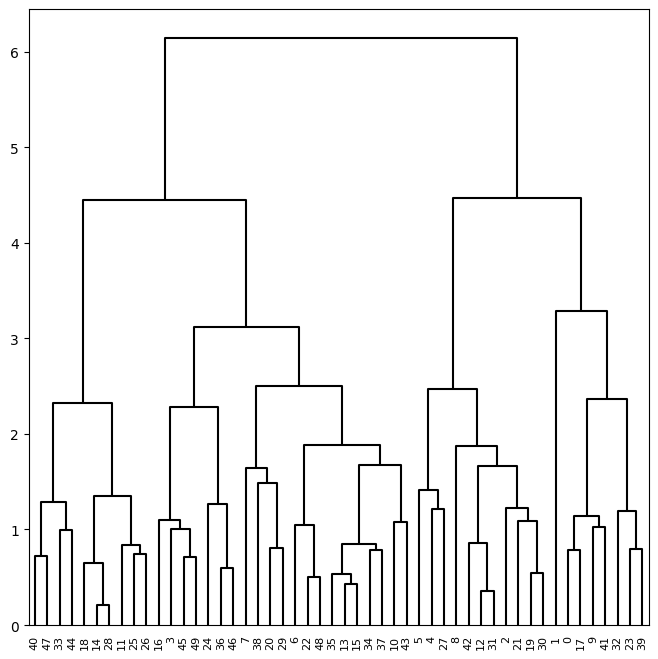

In [46]:
cargs = {'color_threshold':-np.inf, # not using the default coloring method
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp) # compute the linkage-matrix representation
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);


We may want to color branches of the tree above
and below a cut-threshold differently. This can be achieved
by changing the `color_threshold`. Let’s cut the tree at a height of 4,
coloring links that merge above 4 in black.

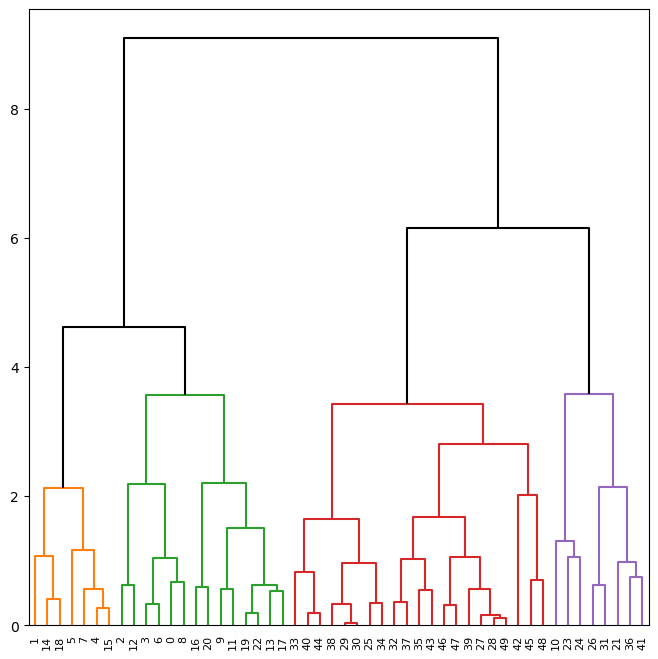

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black');


To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cut_tree()` 
function from `scipy.cluster.hierarchy`:

In [87]:
cut_tree(linkage_comp, n_clusters=4).T


array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

This can also be achieved by providing an argument `n_clusters`
to `HClust()`; however each cut would require recomputing
the clustering. Similarly, trees may be cut by distance threshold
with an argument of `distance_threshold` to `HClust()`
or `height` to `cut_tree()`.

In [91]:
cut_tree(linkage_comp, height=5).T


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2]])

To scale the variables before performing hierarchical clustering of
the observations, we use `StandardScaler()`  as in our PCA example:

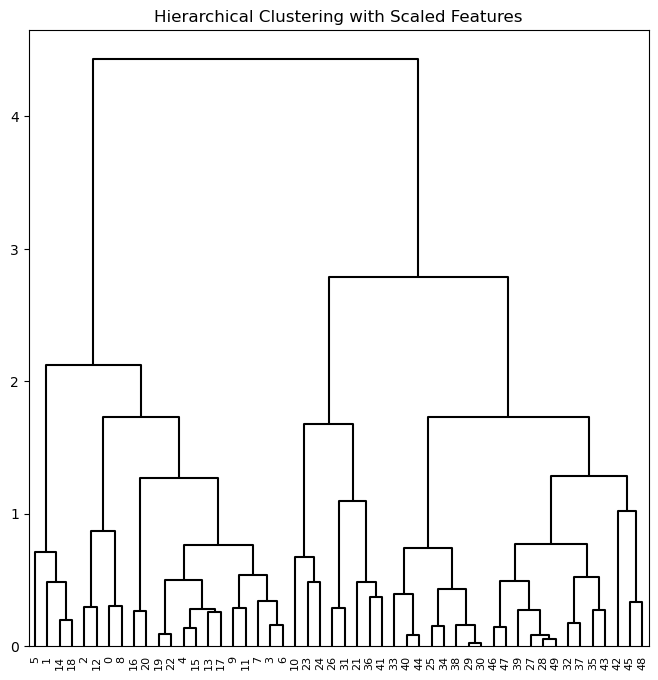

In [89]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale, ax=ax, **cargs)
ax.set_title("Hierarchical Clustering with Scaled Features");


Correlation-based distances between observations can be used for
clustering. The correlation between two observations measures the
similarity of their feature values. {Suppose each observation has
  $p$ features, each a single numerical value. We measure the
  similarity of two such observations by computing the
  correlation of these $p$ pairs of numbers.}
With $n$ observations, the $n\times n$ correlation matrix can then be used as a similarity (or affinity) matrix, i.e. so that one minus the correlation matrix is the dissimilarity matrix used for clustering.

Note that using correlation only makes sense for
data with at least three features since the absolute correlation
between any two observations with measurements on two features is
always one. Hence, we will cluster a three-dimensional data set.

In [47]:
X = np.random.standard_normal((30, 3))
X

array([[-1.16594595,  0.30851845,  1.75862023],
       [-0.12634579, -0.70753035,  0.82494646],
       [-1.13637131, -0.63732438, -0.21251823],
       [ 1.56057266, -0.21685181,  0.57119242],
       [-0.53771615,  0.60294229,  0.96564167],
       [-1.49526932,  0.87240335,  0.08259931],
       [ 0.69805827, -1.56582591,  0.50255224],
       [-1.01241794, -1.93648451,  0.58295336],
       [-0.73631386, -0.0487139 ,  1.33431199],
       [ 0.5476733 ,  1.16447054, -1.64350078],
       [-1.03016467,  0.76105859, -1.51333585],
       [ 1.39479578, -1.29216734,  0.9328604 ],
       [-0.63040852, -0.03951583,  1.33939261],
       [ 1.06676051, -0.24759067,  0.2003391 ],
       [-0.40400957,  0.45796191,  0.03079189],
       [ 0.85601924,  0.59937727,  1.27243912],
       [-0.35353192, -1.41232543,  0.23916032],
       [ 0.52209016,  1.17106566,  0.90454207],
       [ 0.24275474, -0.66712393, -1.59646483],
       [ 0.98964551, -0.52281716, -0.85329444],
       [-0.98860438,  0.61111877,  0.044

In [48]:
corD = 1 - np.corrcoef(X)
corD.shape

(30, 30)

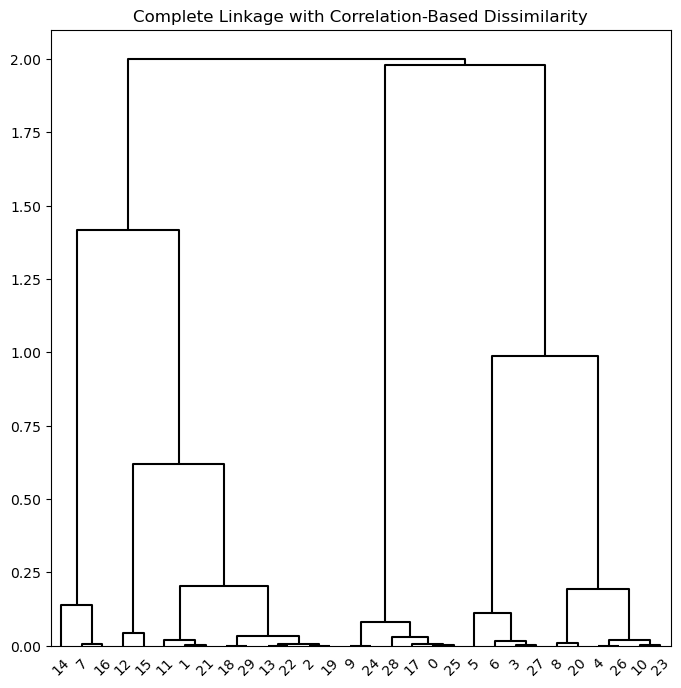

In [90]:

hc_cor = HClust(linkage='complete',
                distance_threshold=0,
                n_clusters=None,
                metric='precomputed')
hc_cor.fit(corD) # use precomputed distance matrix: correlation matrix
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor, ax=ax, **cargs)
ax.set_title("Complete Linkage with Correlation-Based Dissimilarity");


## NCI60 Data Example
Unsupervised techniques are often used in the analysis of genomic
data. In particular, PCA and hierarchical clustering are popular
tools.  We illustrate these techniques on the `NCI60`  cancer cell line
microarray data, which consists of 6830 gene expression
measurements on 64 cancer cell lines.

In [49]:
NCI60 = load_data('NCI60')
NCI60



{'data': array([[ 0.3     ,  1.18    ,  0.55    , ...,  0.28    , -0.34    ,
         -1.93    ],
        [ 0.679961,  1.289961,  0.169961, ..., -0.770039, -0.390039,
         -2.000039],
        [ 0.94    , -0.04    , -0.17    , ..., -0.12    , -0.41    ,
          0.      ],
        ...,
        [ 0.21    , -0.62    , -0.15    , ...,  0.16    ,  2.03    ,
          3.94    ],
        [-0.05    ,  0.14    , -0.09    , ..., -0.49    ,  0.01    ,
         -1.72    ],
        [ 0.35    , -0.27    ,  0.02    , ...,  0.29    , -0.15    ,
          1.21    ]]),
 'labels':        label
 0        CNS
 1        CNS
 2        CNS
 3      RENAL
 4     BREAST
 ..       ...
 59  MELANOMA
 60  MELANOMA
 61  MELANOMA
 62  MELANOMA
 63  MELANOMA
 
 [64 rows x 1 columns]}

In [50]:
nci_labs = NCI60['labels']
nci_labs


,label
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST
...,...
59,MELANOMA
60,MELANOMA
61,MELANOMA
62,MELANOMA


In [51]:
nci_data = NCI60['data']
nci_data

array([[ 0.3     ,  1.18    ,  0.55    , ...,  0.28    , -0.34    ,
        -1.93    ],
       [ 0.679961,  1.289961,  0.169961, ..., -0.770039, -0.390039,
        -2.000039],
       [ 0.94    , -0.04    , -0.17    , ..., -0.12    , -0.41    ,
         0.      ],
       ...,
       [ 0.21    , -0.62    , -0.15    , ...,  0.16    ,  2.03    ,
         3.94    ],
       [-0.05    ,  0.14    , -0.09    , ..., -0.49    ,  0.01    ,
        -1.72    ],
       [ 0.35    , -0.27    ,  0.02    , ...,  0.29    , -0.15    ,
         1.21    ]])

Each cell line is labeled with a cancer type. We do not make use of
the cancer types in performing PCA and clustering, as these are
unsupervised techniques. But after performing PCA and clustering, we
will check to see the extent to which these cancer types agree with
the results of these unsupervised techniques.

The data has 64 rows and 6830 columns.

In [52]:
nci_data.shape


(64, 6830)

We begin by examining the cancer types for the cell lines.


In [53]:
nci_labs.value_counts()


label      
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
dtype: int64

### PCA on the NCI60 Data

We first perform PCA on the data after scaling the variables (genes)
to have standard deviation one, although here one could reasonably argue
that it is better not to scale the genes as they are measured in the same units.

In [54]:
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(nci_scaled)


We now plot the first few principal component score vectors, in order
to visualize the data. The observations (cell lines) corresponding to
a given cancer type will be plotted in the same color, so that we can
see to what extent the observations within a cancer type are similar
to each other. 

In [56]:
cancer_types = list(np.unique(nci_labs))
cancer_types

['BREAST',
 'CNS',
 'COLON',
 'K562A-repro',
 'K562B-repro',
 'LEUKEMIA',
 'MCF7A-repro',
 'MCF7D-repro',
 'MELANOMA',
 'NSCLC',
 'OVARIAN',
 'PROSTATE',
 'RENAL',
 'UNKNOWN']

In [58]:
nci_groups = np.array([cancer_types.index(lab)
                       for lab in nci_labs.values])
nci_groups

array([ 1,  1,  1, 12,  0,  1,  1,  0,  9,  9, 12, 12, 12, 12, 12, 12, 12,
        0,  9, 12, 13, 10,  8, 11, 10, 10, 10, 10, 10, 11,  9,  9,  9,  5,
        4,  3,  5,  5,  5,  5,  5,  2,  2,  2,  2,  2,  2,  2,  6,  0,  7,
        0,  9,  9,  9,  8,  0,  0,  8,  8,  8,  8,  8,  8])

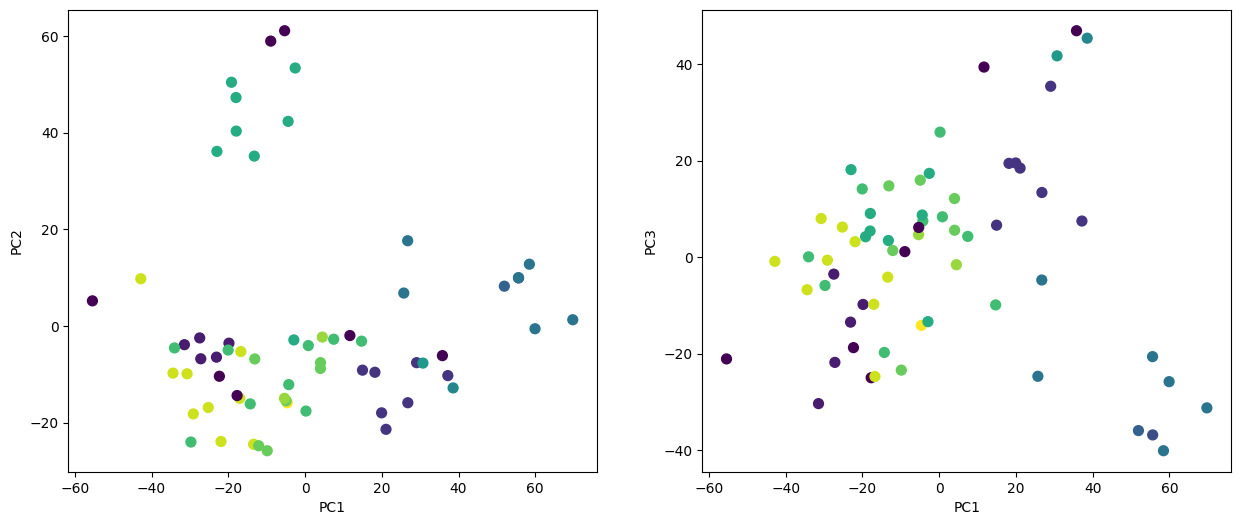

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.scatter(nci_scores[:,0],
           nci_scores[:,1],
           c=nci_groups,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
ax = axes[1]
ax.scatter(nci_scores[:,0],
           nci_scores[:,2],
           c=nci_groups,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC3');


On the whole, cell lines corresponding to a single cancer type do tend to
have similar values on the first few principal component score
vectors. This indicates that cell lines from the same cancer type tend
to have pretty similar gene expression levels.


    

We can also plot the percent variance
explained by the principal components as well as the cumulative percent variance explained.
This is similar to the plots we made earlier for the `USArrests` data.

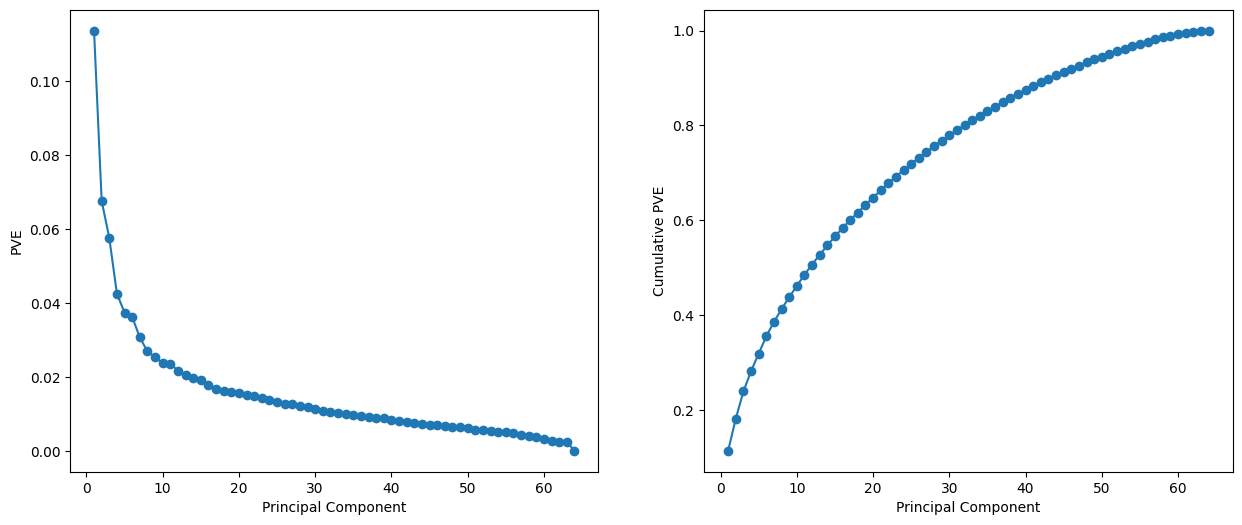

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ticks = np.arange(nci_pca.n_components_)+1
ax.plot(ticks,
        nci_pca.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks,
        nci_pca.explained_variance_ratio_.cumsum(),
        marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');


### Clustering the Observations of the NCI60 Data

We now perform hierarchical clustering of the cell lines in the `NCI60` data using
complete, single, and   average linkage. Once again, the goal is to find out whether or not the observations cluster into distinct types of cancer. Euclidean
distance is used as the dissimilarity measure. We first write a short
function to  produce
the three dendrograms.

In [61]:
def plot_nci(linkage, ax, cut=-np.inf):
    cargs = {'above_threshold_color':'black',
             'color_threshold':cut}
    hc = HClust(n_clusters=None,
                distance_threshold=0,
                linkage=linkage.lower()).fit(nci_scaled)
    linkage_ = compute_linkage(hc)
    dendrogram(linkage_,
               ax=ax,
               labels=np.asarray(nci_labs),
               leaf_font_size=10,
               **cargs)
    ax.set_title('%s Linkage' % linkage)
    return hc


Let’s  plot our results.

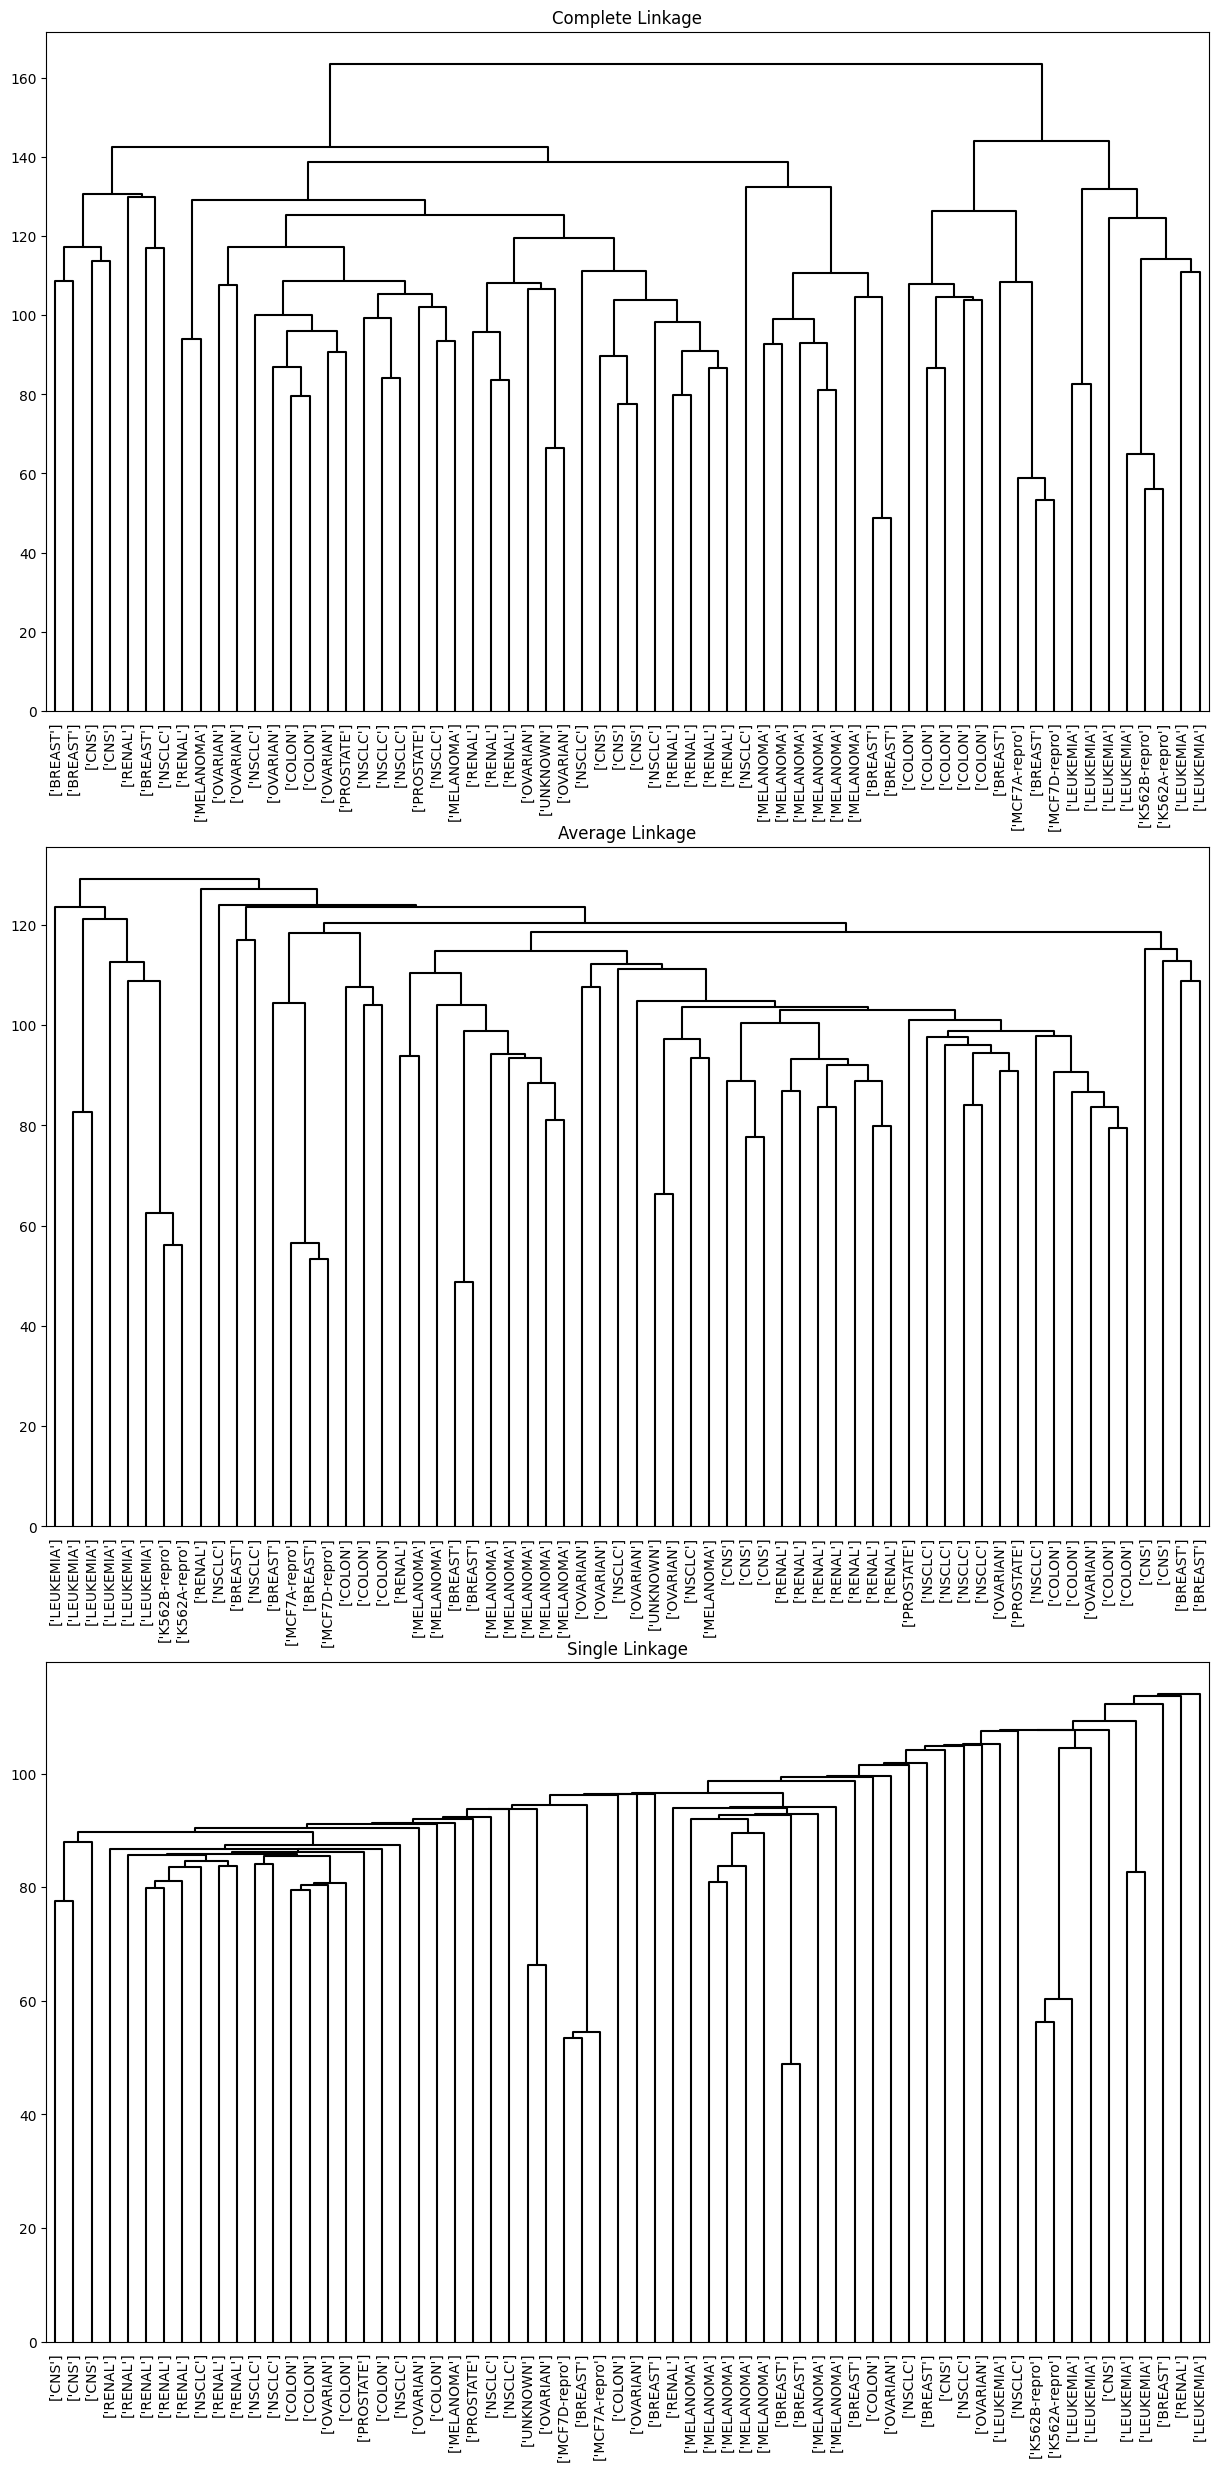

In [62]:
fig, axes = plt.subplots(3, 1, figsize=(15,30))      
ax = axes[0]; hc_comp = plot_nci('Complete', ax)
ax = axes[1]; hc_avg = plot_nci('Average', ax)
ax = axes[2]; hc_sing = plot_nci('Single', ax)


We see that the
choice of linkage certainly does affect the results
obtained. Typically, single linkage will tend to yield *trailing*
clusters: very large clusters onto which individual observations
attach one-by-one. On the other hand, complete and average linkage
tend to yield more balanced, attractive clusters. For this reason,
complete and average linkage are generally preferred to single
linkage.  Clearly cell lines within a single cancer type do tend to
cluster together, although the clustering is not perfect. We will use
complete linkage hierarchical clustering for the analysis that
follows.
 
We can cut the dendrogram at the height that will yield a particular
number of clusters, say four:

In [63]:
linkage_comp = compute_linkage(hc_comp)

In [65]:
cut_tree(linkage_comp, n_clusters=4);

In [66]:
comp_cut = cut_tree(linkage_comp, n_clusters=4).reshape(-1)
comp_cut

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

`pd.crosstab(...)`: This function is used to compute a cross-tabulation of the two variables provided as arguments. In this case, it's creating a cross-tabulation between the 'label' column from nci_labs and the 'Complete' Series derived from comp_cut.

The resulting table will show the frequency of occurrences of each combination of values from the 'label' column and the 'Complete' Series. It can provide insights into the relationship between these categorical variables and help in understanding how they are distributed across different categories.

In [67]:


pd.crosstab(nci_labs['label'],
            pd.Series(comp_cut.reshape(-1), name='Complete'))


Complete,0,1,2,3
label,,,,
BREAST,2,3,0,2
CNS,3,2,0,0
COLON,2,0,0,5
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


We can plot a cut on the dendrogram that produces these four clusters:

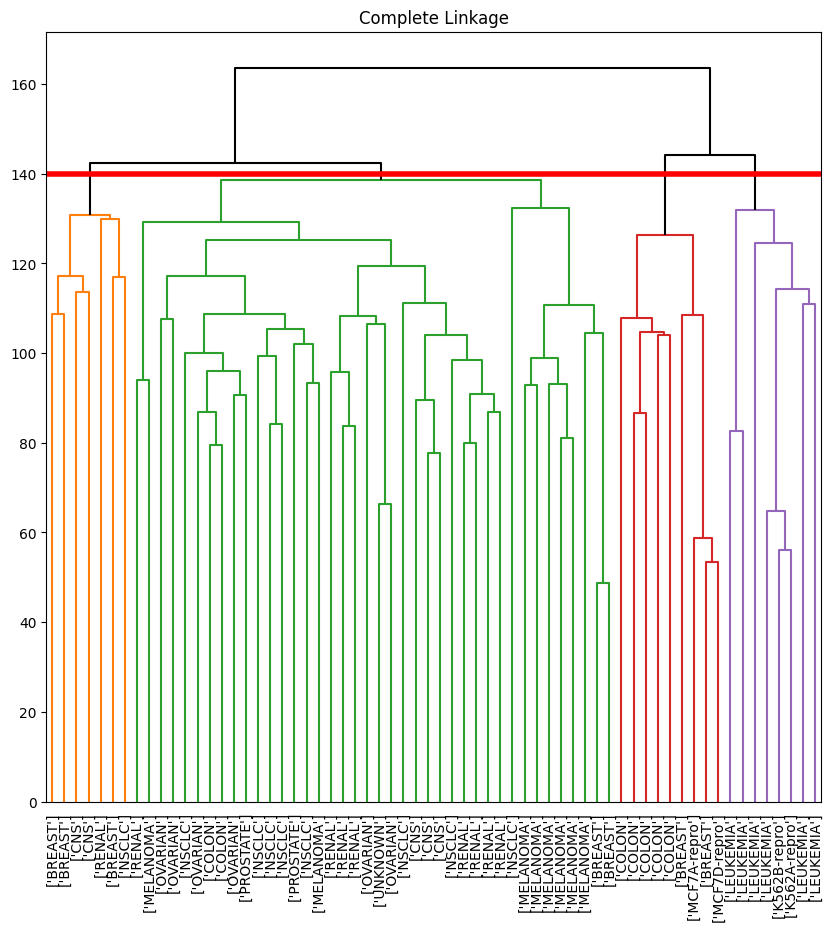

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
plot_nci('Complete', ax, cut=140)
ax.axhline(140, c='r', linewidth=4);


The `axhline()`  function draws a horizontal line  line on top of any
existing set of axes. The argument `140` plots a horizontal
line at height 140 on the dendrogram; this is a height that
results in four distinct clusters. It is easy to verify that the
resulting clusters are the same as the ones we obtained in
`comp_cut`.

We claimed earlier in Section 12.4.2 that
$K$-means clustering and hierarchical clustering with the dendrogram
cut to obtain the same number of clusters can yield very different
results.  How do these `NCI60` hierarchical clustering results compare
to what we get if we perform $K$-means clustering with $K=4$?

In [68]:
nci_kmeans = KMeans(n_clusters=4, 
                    random_state=0,
                    n_init=20).fit(nci_scaled)
pd.crosstab(pd.Series(comp_cut, name='HClust'),
            pd.Series(nci_kmeans.labels_, name='K-means'))


K-means,0,1,2,3
HClust,,,,
0,1,20,10,9
1,0,7,0,0
2,8,0,0,0
3,0,0,9,0


We see that the four clusters obtained using hierarchical clustering
and $K$-means clustering are somewhat different. First we note
that the labels in the two clusterings are arbitrary. That is, swapping
the identifier of the cluster does not
change the clustering. We see here Cluster 3 in
$K$-means clustering is identical to cluster 2 in hierarchical
clustering. However, the other clusters differ: for instance,
cluster 0 in $K$-means clustering contains a portion of the
observations assigned to cluster 0 by hierarchical clustering, as well
as all of the observations assigned to cluster 1 by hierarchical
clustering.

Rather than performing hierarchical clustering on the entire data
matrix, we can also perform hierarchical clustering on the first few
principal component score vectors, regarding these first few components
as a less noisy version of the data.

Complete-PCA,0,1,2,3
label,,,,
BREAST,0,5,0,2
CNS,2,3,0,0
COLON,7,0,0,0
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,2,0,4,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,1,7,0,0


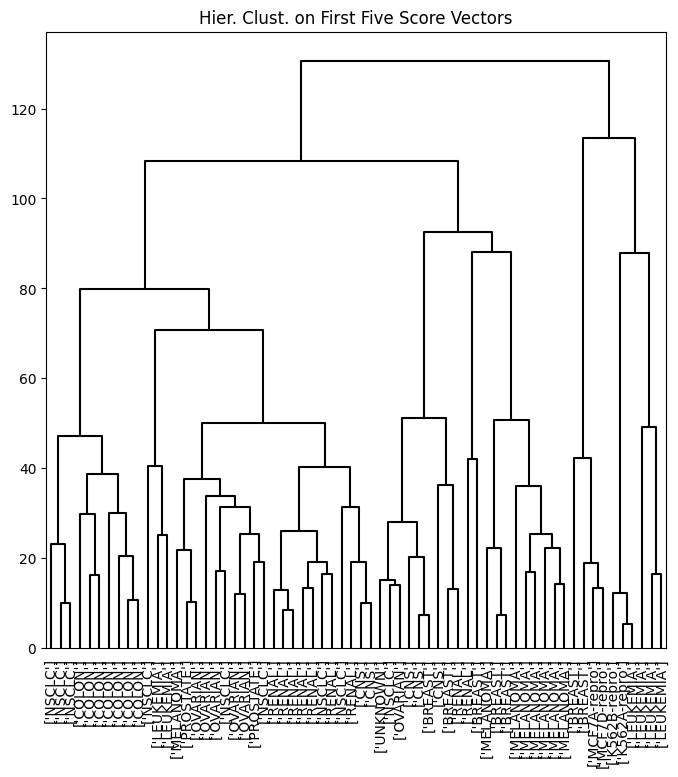

In [69]:
hc_pca = HClust(n_clusters=None,
                distance_threshold=0,
                linkage='complete'
                ).fit(nci_scores[:,:5])
linkage_pca = compute_linkage(hc_pca)
fig, ax = plt.subplots(figsize=(8,8))
dendrogram(linkage_pca,
           labels=np.asarray(nci_labs),
           leaf_font_size=10,
           ax=ax,
           **cargs)
ax.set_title("Hier. Clust. on First Five Score Vectors")
pca_labels = pd.Series(cut_tree(linkage_pca,
                                n_clusters=4).reshape(-1),
                       name='Complete-PCA')
pd.crosstab(nci_labs['label'], pca_labels)
